In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
#Importing all the necessory libraries

In [3]:
df=pd.read_csv('CIC-IoT23-00144.csv')

In [4]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.402005,0.402005,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308997e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS Attacks
1,0.000000,54.00,6.00,64.00,29.249152,29.249152,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308935e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS Attacks
2,7.148071,241.21,6.00,64.00,0.499301,0.499301,0.0,0.0,1.0,0.0,...,1.289955,54.32,8.297241e+07,9.5,10.436969,1.826693,7.584117,0.25,141.55,DoS Attacks
3,0.000000,0.00,1.00,64.00,1.443992,1.443992,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.313274e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS Attacks
4,5.769755,108.00,6.00,64.00,0.346635,0.346635,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306854e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS Attacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244854,0.000000,0.00,44.24,75.46,11.343913,11.343913,0.0,0.0,0.0,0.0,...,43.771784,547.52,8.365138e+07,9.5,32.460318,61.949865,10675.345724,0.18,141.55,Mirai Botnet Attacks
244855,0.041362,13585.00,17.00,64.00,7361.789395,7361.789395,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.309870e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS Attacks
244856,0.024762,27075.00,17.00,64.00,21860.178277,21860.178277,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301549e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS Attacks
244857,0.000000,0.00,1.00,64.00,69.689031,69.689031,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314997e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS Attacks


In [5]:
total_nan = df.isna().sum().sum()
print("Total NaN values in the dataset:", total_nan)

Total NaN values in the dataset: 0


In [6]:
zero_counts = (df == 0).sum()
print(zero_counts)

flow_duration      132935
Header_Length       39597
Protocol Type           3
Duration                3
Rate                 4981
Srate                4981
Drate              244839
fin_flag_number    223799
syn_flag_number    193804
rst_flag_number    222857
psh_flag_number    223572
ack_flag_number    214858
ece_flag_number    244859
cwr_flag_number    244859
ack_count          214677
syn_count          171361
fin_count          212564
urg_count          195179
rst_count          180667
HTTP               232914
HTTPS              231347
DNS                244833
Telnet             244859
SMTP               244859
SSH                244852
IRC                244859
TCP                104613
UDP                192967
DHCP               244859
ARP                244836
ICMP               204480
IPv                    31
LLC                    31
Tot sum                 0
Min                     0
Max                     0
AVG                     0
Std                166490
Tot size    

In [7]:

# Check if all columns in the dataframe are numerical
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numerical columns:", list(non_numerical_cols))
print("All columns are numerical:", len(non_numerical_cols) == 0)

Non-numerical columns: ['label']
All columns are numerical: False


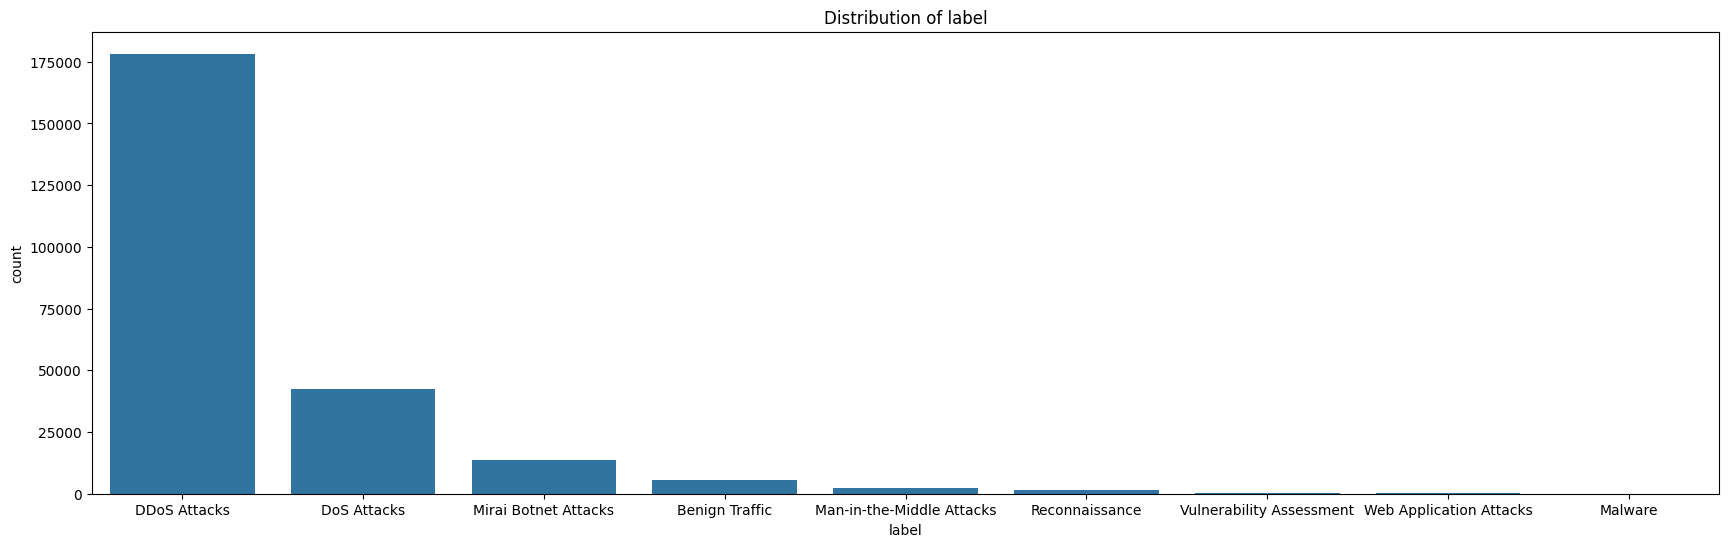

In [8]:
plt.figure(figsize=(21, 6))  
sns.countplot(data=df, x='label')
plt.title('Distribution of label')
plt.show()

In [9]:
print(df['label'].value_counts())

label
DDoS Attacks                 178226
DoS Attacks                   42547
Mirai Botnet Attacks          13814
Benign Traffic                 5680
Man-in-the-Middle Attacks      2513
Reconnaissance                 1709
Vulnerability Assessment        186
Web Application Attacks         144
Malware                          40
Name: count, dtype: int64


In [10]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
print("Encoded labels:", np.unique(df['label']))

Encoded labels: [0 1 2 3 4 5 6 7 8]


In [11]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.402005,0.402005,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308997e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
1,0.000000,54.00,6.00,64.00,29.249152,29.249152,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308935e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
2,7.148071,241.21,6.00,64.00,0.499301,0.499301,0.0,0.0,1.0,0.0,...,1.289955,54.32,8.297241e+07,9.5,10.436969,1.826693,7.584117,0.25,141.55,2
3,0.000000,0.00,1.00,64.00,1.443992,1.443992,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.313274e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
4,5.769755,108.00,6.00,64.00,0.346635,0.346635,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306854e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244854,0.000000,0.00,44.24,75.46,11.343913,11.343913,0.0,0.0,0.0,0.0,...,43.771784,547.52,8.365138e+07,9.5,32.460318,61.949865,10675.345724,0.18,141.55,5
244855,0.041362,13585.00,17.00,64.00,7361.789395,7361.789395,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.309870e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,1
244856,0.024762,27075.00,17.00,64.00,21860.178277,21860.178277,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301549e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,2
244857,0.000000,0.00,1.00,64.00,69.689031,69.689031,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314997e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1


In [12]:
X=df.drop(columns='label')
y=df['label']

In [13]:
X = X.values
y = y.values  # optional, if needed by your classifier


In [14]:
selected_features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Srate', 'fin_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'rst_count', 'HTTP', 'SSH', 'IRC', 'DHCP', 'ICMP', 'IPv', 'AVG', 'Std', 'IAT', 'Number', 'Variance']
X_selected = df[selected_features].values

In [15]:
df_selected = df[selected_features + ['label']]
print(df_selected.head())

   flow_duration  Header_Length  Protocol Type  Duration      Srate  \
0       0.000000          54.00            6.0      64.0   0.402005   
1       0.000000          54.00            6.0      64.0  29.249152   
2       7.148071         241.21            6.0      64.0   0.499301   
3       0.000000           0.00            1.0      64.0   1.443992   
4       5.769755         108.00            6.0      64.0   0.346635   

   fin_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   ece_flag_number  ...  IRC  DHCP  ICMP  IPv        AVG       Std  \
0              0.0  ...  0.0   0.0   0.0  1.0  54.000000  0.0000

In [16]:
df=df_selected

In [17]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Srate,fin_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,IRC,DHCP,ICMP,IPv,AVG,Std,IAT,Number,Variance,label
0,0.000000,54.00,6.00,64.00,0.402005,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.000000,0.000000,8.308997e+07,9.5,0.00,1
1,0.000000,54.00,6.00,64.00,29.249152,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.000000,0.000000,8.308935e+07,9.5,0.00,1
2,7.148071,241.21,6.00,64.00,0.499301,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.469661,1.289955,8.297241e+07,9.5,0.25,2
3,0.000000,0.00,1.00,64.00,1.443992,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,42.000000,0.000000,8.313274e+07,9.5,0.00,1
4,5.769755,108.00,6.00,64.00,0.346635,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.000000,0.000000,8.306854e+07,9.5,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244854,0.000000,0.00,44.24,75.46,11.343913,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,533.074610,43.771784,8.365138e+07,9.5,0.18,5
244855,0.041362,13585.00,17.00,64.00,7361.789395,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,0.000000,8.309870e+07,9.5,0.00,1
244856,0.024762,27075.00,17.00,64.00,21860.178277,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,0.000000,8.301549e+07,9.5,0.00,2
244857,0.000000,0.00,1.00,64.00,69.689031,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,42.000000,0.000000,8.314997e+07,9.5,0.00,1


In [18]:
X=df.drop(columns='label')
y=df['label']

In [19]:
X = X.values
y = y.values  # optional, if needed by your classifier

In [20]:
from imblearn.combine import SMOTEENN

# Apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

print("Balanced class distribution:", np.bincount(y_balanced))

Balanced class distribution: [170103 177959 178091 176606 171559 177875 172452 178077 173838]


In [21]:
len(X_balanced)

1576560

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced  # ensures label distribution is preserved in both sets
)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [24]:
y_train_balanced = y_train

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import time

Training time: 70.0547 seconds
Prediction time: 0.1128 seconds
Accuracy: 0.9843
Precision (macro): 0.9840
Recall (macro): 0.9840
F1-score (macro): 0.9840


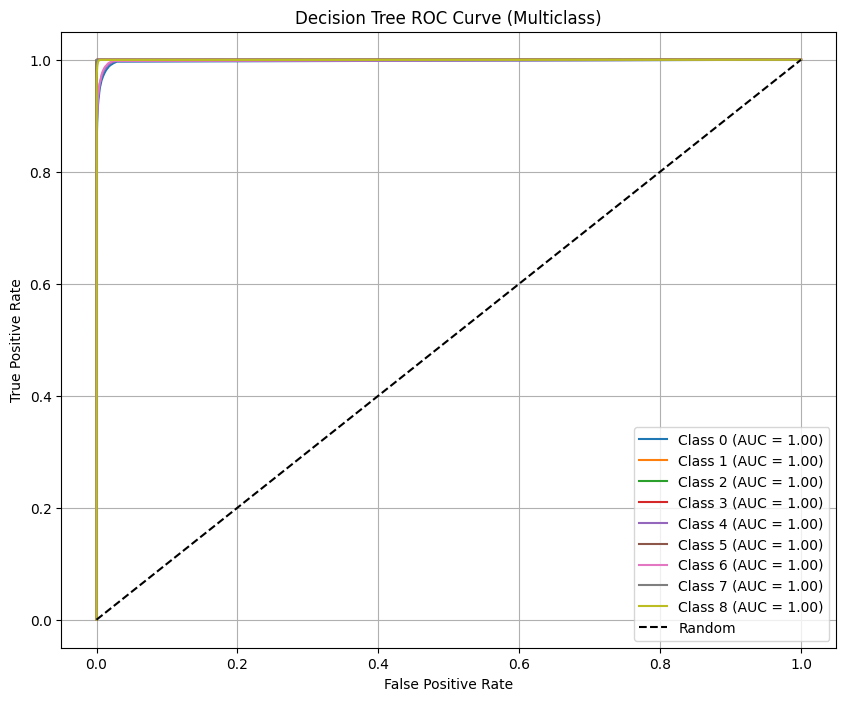

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import time

# Define your decision tree with manually selected hyperparameters
dt = DecisionTreeClassifier(
    max_depth=40,
    min_samples_split=5,
    min_samples_leaf=32,
    class_weight='balanced',
    random_state=42
)

# Optional: Use StratifiedKFold to ensure consistent splits, but not used here
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train the model ONCE on the full training set
start_train = time.time()
dt.fit(X_train_scaled, y_train_balanced)
train_time = time.time() - start_train

# Predict on the test set
start_pred = time.time()
y_pred = dt.predict(X_test_scaled)
pred_time = time.time() - start_pred

# Metrics on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for multiclass
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = dt.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


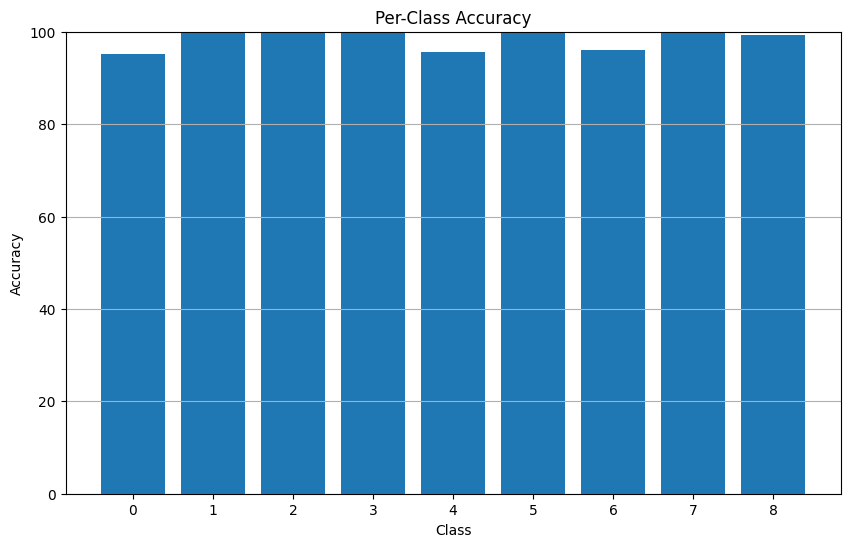

In [27]:

from sklearn.metrics import confusion_matrix

# Plot accuracy for all classes

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4570
[LightGBM] [Info] Number of data points in the train set: 1261248, number of used feat

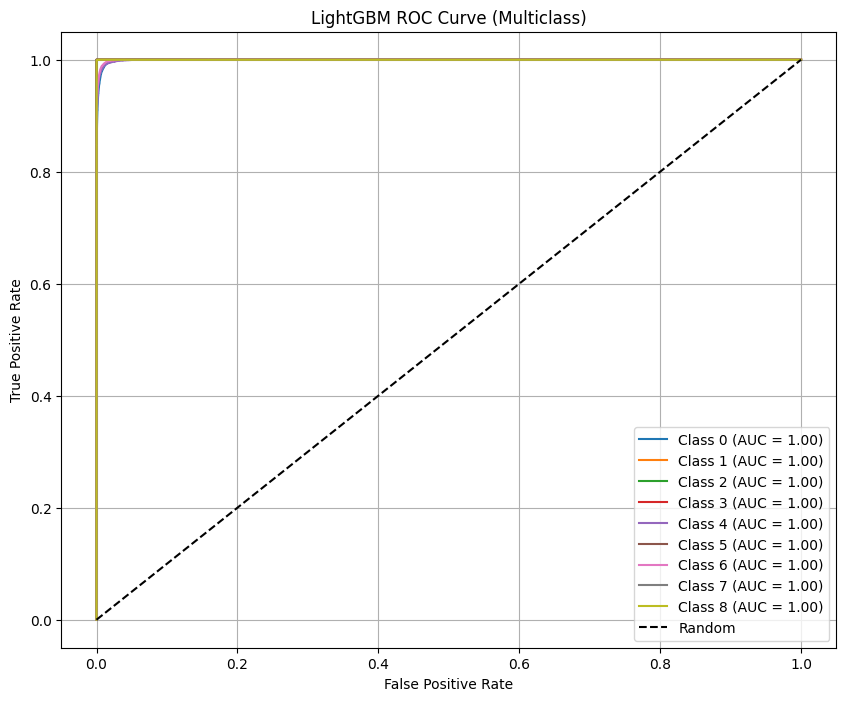

In [28]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

# Manually specified number of classes
n_classes = len(np.unique(y_train_balanced))

# Binarize the true labels for ROC curve
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Define LGBM model with manually chosen parameters
lgbm = LGBMClassifier(
    objective='multiclass',
    boosting_type='gbdt',
    num_class=n_classes,
    num_leaves=64,
    max_depth=16,
    min_data_in_leaf=100,
    learning_rate=0.05,
    lambda_l1=0.1,
    lambda_l2=1,
    random_state=42
)

# Train the model once
start_train = time.time()
lgbm.fit(X_train_scaled, y_train_balanced)
train_time = time.time() - start_train

# Predict on test set
start_pred = time.time()
y_pred_lgbm = lgbm.predict(X_test_scaled)
pred_time = time.time() - start_pred

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_lgbm, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_lgbm, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for multiclass
y_score_lgbm = lgbm.predict_proba(X_test_scaled)
fpr_lgbm = dict()
tpr_lgbm = dict()
roc_auc_lgbm = dict()
for i in range(n_classes):
    fpr_lgbm[i], tpr_lgbm[i], _ = roc_curve(y_test_bin[:, i], y_score_lgbm[:, i])
    roc_auc_lgbm[i] = auc(fpr_lgbm[i], tpr_lgbm[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_lgbm[i], tpr_lgbm[i], label=f'Class {i} (AUC = {roc_auc_lgbm[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


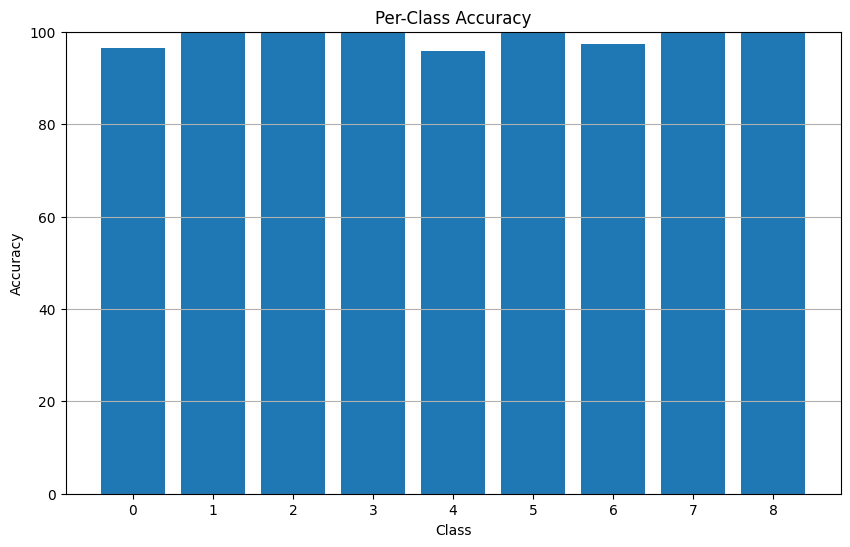

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Training time: 0.1699 seconds
Prediction time: 695.1504 seconds
Accuracy: 0.9626
Precision (macro): 0.9623
Recall (macro): 0.9623
F1-score (macro): 0.9622


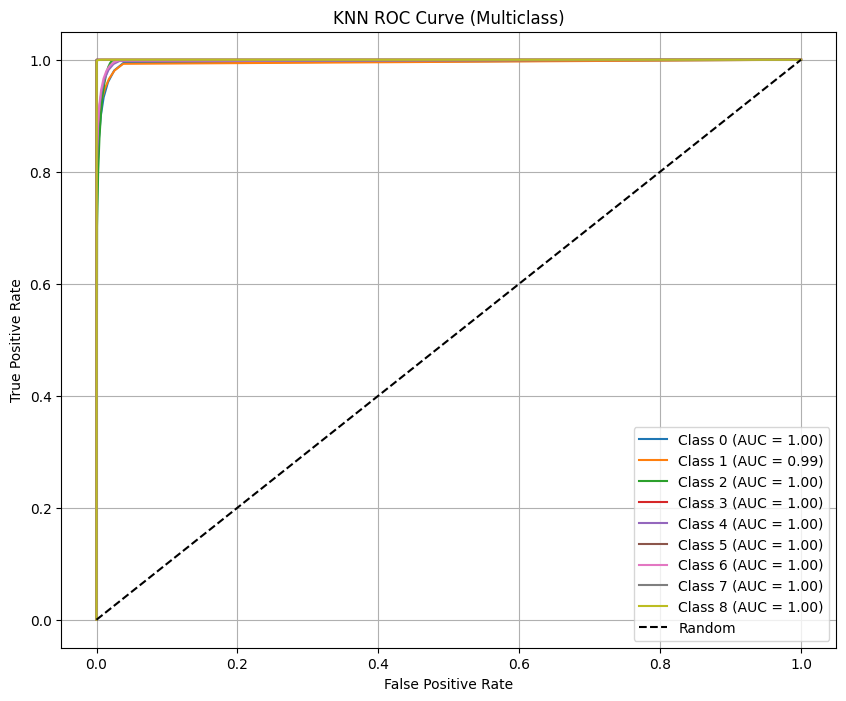

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Define number of classes (if not defined earlier)
n_classes = len(np.unique(y_train_balanced))

# Binarize test labels for ROC curve
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Manually specified KNN model
knn = KNeighborsClassifier(
    n_neighbors=10,
    n_jobs=-1
)

# Train the model
start_train = time.time()
knn.fit(X_train_scaled, y_train_balanced)
train_time = time.time() - start_train

# Predict on test set
start_pred = time.time()
y_pred_knn = knn.predict(X_test_scaled)
pred_time = time.time() - start_pred

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_knn, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_knn, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for multiclass
y_score_knn = knn.predict_proba(X_test_scaled)
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


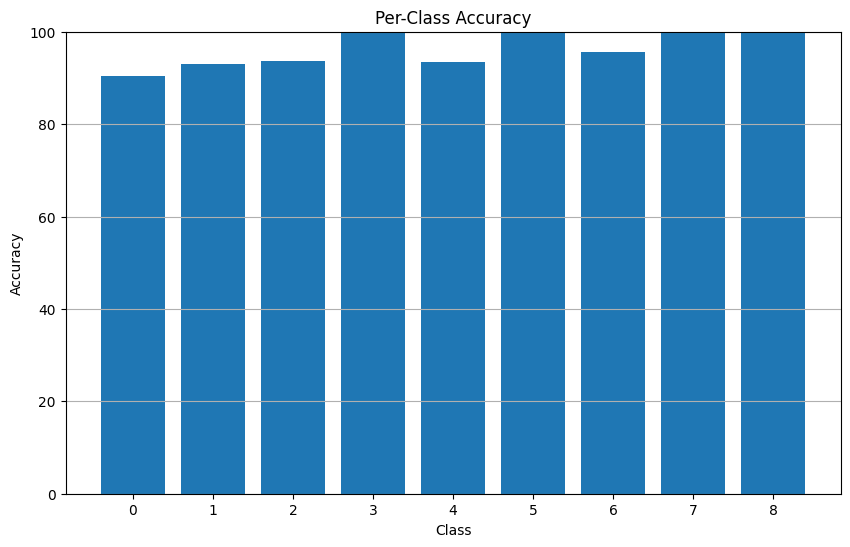

In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

Training time: 9818.3204 seconds
Prediction time: 18.9829 seconds
Accuracy: 0.9893
Precision (macro): 0.9893
Recall (macro): 0.9892
F1-score (macro): 0.9892


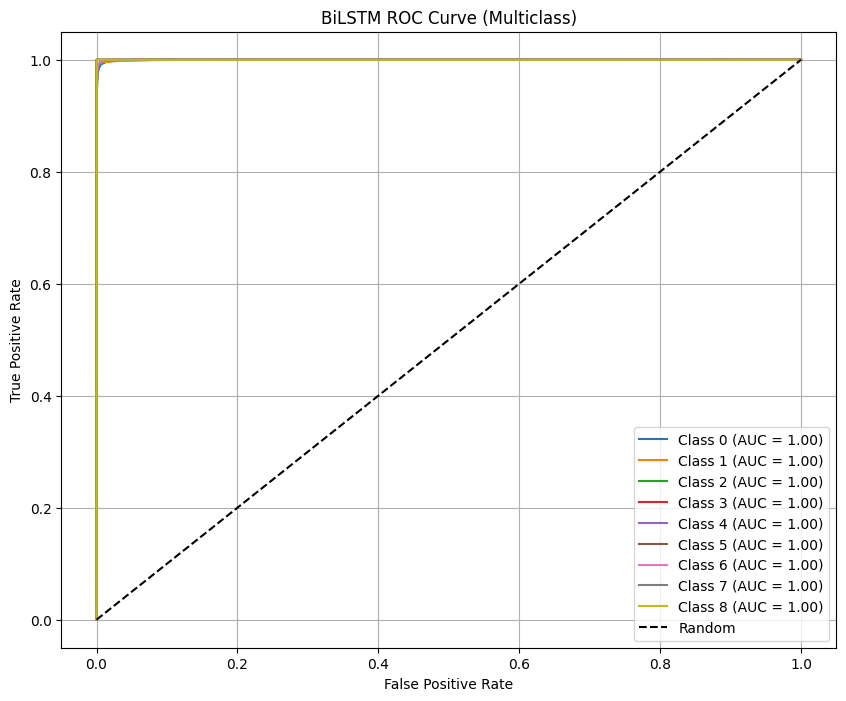

In [33]:
# Set parameters manually
hidden_dim = 256
num_layers = 2
lr = 1e-3
batch_size = 256
epochs = 20

# Prepare data
X_train_seq = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)
X_test_seq = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_seq, y_train_tensor)
test_dataset = TensorDataset(X_test_seq, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# Define BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, 
                            batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_scaled.shape[1]
n_classes = len(np.unique(y_train_balanced))
bilstm = BiLSTM(input_dim, hidden_dim, n_classes, num_layers).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(bilstm.parameters(), lr=lr)

# Train the model ONCE
start_train = time.time()
bilstm.train()
for epoch in range(epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = bilstm(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
train_time = time.time() - start_train

# Evaluate
bilstm.eval()
start_pred = time.time()
all_preds, all_probs = [], []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        logits = bilstm(xb)
        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.append(preds.cpu())
        all_probs.append(probs.cpu())
pred_time = time.time() - start_pred

# Convert predictions
y_pred_bilstm = torch.cat(all_preds).numpy()
y_score_bilstm = torch.cat(all_probs).numpy()

# Metrics
accuracy = accuracy_score(y_test, y_pred_bilstm)
precision = precision_score(y_test, y_pred_bilstm, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_bilstm, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_bilstm, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr_bilstm = dict()
tpr_bilstm = dict()
roc_auc_bilstm = dict()
for i in range(n_classes):
    fpr_bilstm[i], tpr_bilstm[i], _ = roc_curve(y_test_bin[:, i], y_score_bilstm[:, i])
    roc_auc_bilstm[i] = auc(fpr_bilstm[i], tpr_bilstm[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_bilstm[i], tpr_bilstm[i], label=f'Class {i} (AUC = {roc_auc_bilstm[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BiLSTM ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


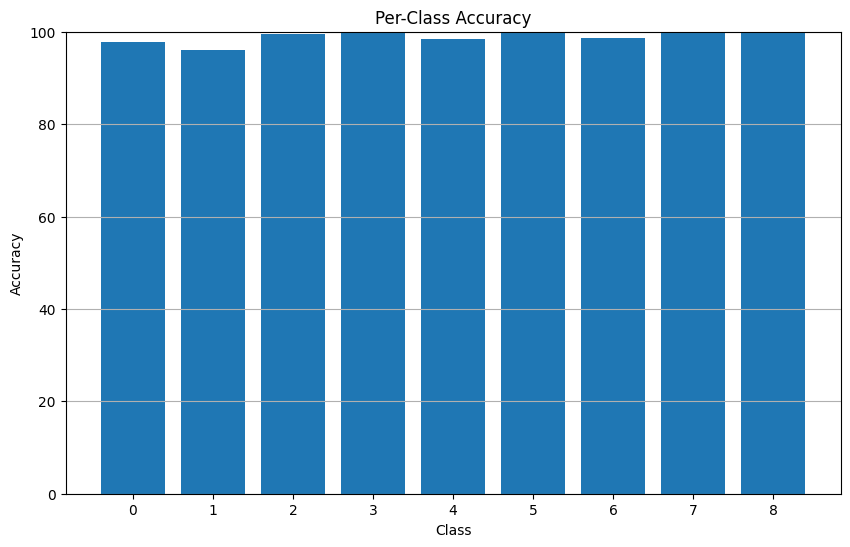

In [34]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_bilstm, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Training time: 1237.0153 seconds
Prediction time: 4.8266 seconds
Accuracy: 0.9278
Precision (macro): 0.9285
Recall (macro): 0.9278
F1-score (macro): 0.9276


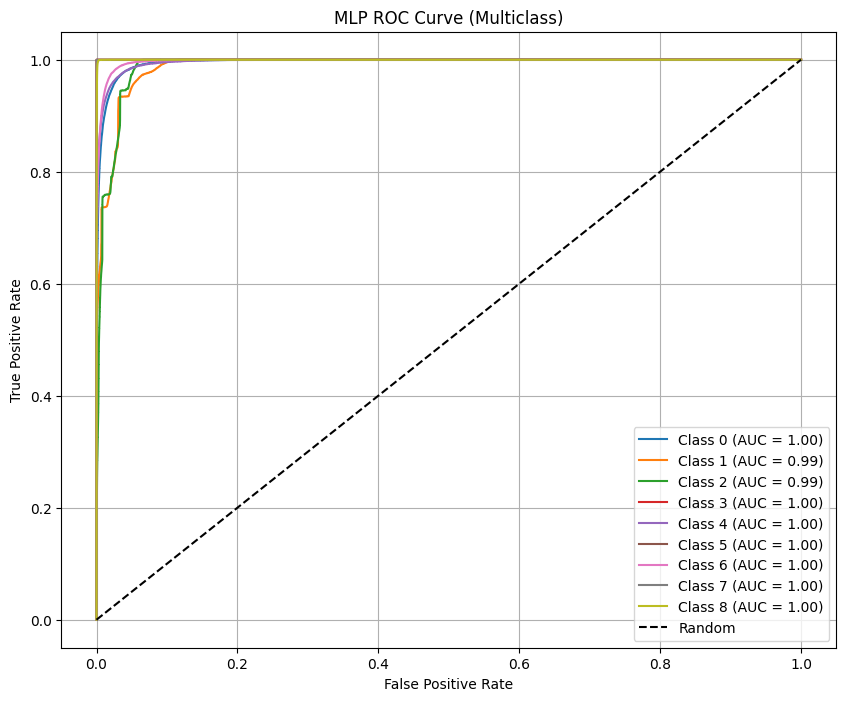

In [35]:
hidden_dim1 = 256
hidden_dim2 = 128
lr = 1e-3  # or 5e-4
batch_size = 256
epochs = 20
n_classes = len(np.unique(y_train_balanced))

# Prepare data
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# Define MLP model
class TunedMLP(nn.Module):
    def __init__(self, input_dim, num_classes, h1, h2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, h1),
            nn.ReLU(),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Linear(h2, num_classes)
        )
    def forward(self, x):
        return self.model(x)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mlp = TunedMLP(X_train_scaled.shape[1], n_classes, hidden_dim1, hidden_dim2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=lr)

# Train the model once
start_train = time.time()
mlp.train()
for epoch in range(epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = mlp(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
train_time = time.time() - start_train

# Prediction
mlp.eval()
start_pred = time.time()
all_preds, all_probs = [], []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        logits = mlp(xb)
        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.append(preds.cpu())
        all_probs.append(probs.cpu())
pred_time = time.time() - start_pred

# Convert outputs
y_pred_mlp = torch.cat(all_preds).numpy()
y_score_mlp = torch.cat(all_probs).numpy()

# Metrics
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_mlp, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_mlp, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for Multiclass
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test_bin[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_mlp[i], tpr_mlp[i], label=f'Class {i} (AUC = {roc_auc_mlp[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


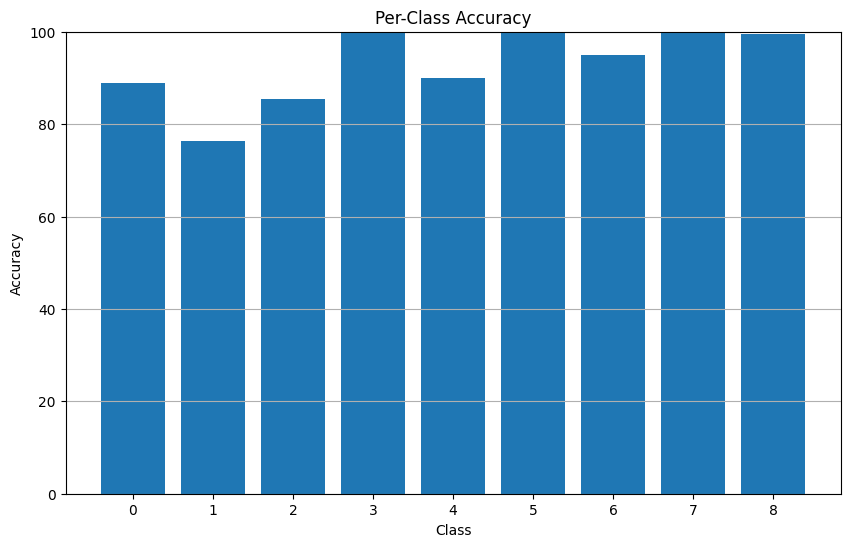

In [36]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Training time: 1381.3918 seconds
Prediction time: 6.9710 seconds
Accuracy: 0.9348
Precision (macro): 0.9415
Recall (macro): 0.9354
F1-score (macro): 0.9342


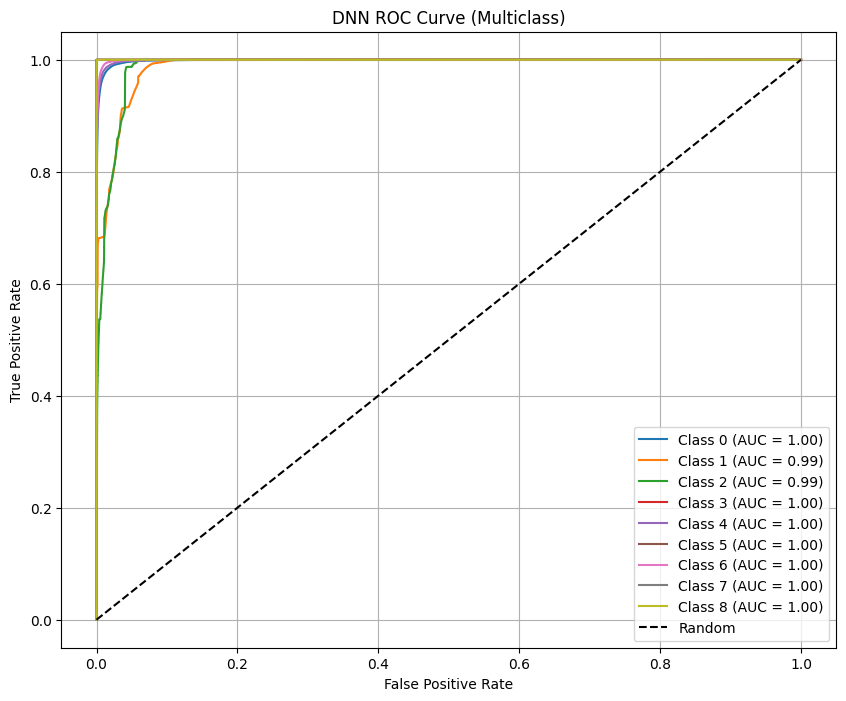

In [37]:
hidden_dim1 = 512
hidden_dim2 = 256
lr = 1e-3
batch_size = 512
epochs = 20
n_classes = len(np.unique(y_train_balanced))

# Prepare data
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# Define DNN model
class TunedDNN(nn.Module):
    def __init__(self, input_dim, num_classes, h1, h2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, h1),
            nn.ReLU(),
            nn.BatchNorm1d(h1),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.BatchNorm1d(h2),
            nn.Linear(h2, num_classes)
        )
    def forward(self, x):
        return self.model(x)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dnn = TunedDNN(X_train_scaled.shape[1], n_classes, hidden_dim1, hidden_dim2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dnn.parameters(), lr=lr)

# Training
start_train = time.time()
dnn.train()
for epoch in range(epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = dnn(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
train_time = time.time() - start_train

# Prediction
dnn.eval()
start_pred = time.time()
all_preds, all_probs = [], []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        logits = dnn(xb)
        probs = torch.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.append(preds.cpu())
        all_probs.append(probs.cpu())
pred_time = time.time() - start_pred

# Convert outputs
y_pred_dnn = torch.cat(all_preds).numpy()
y_score_dnn = torch.cat(all_probs).numpy()

# Metrics
accuracy = accuracy_score(y_test, y_pred_dnn)
precision = precision_score(y_test, y_pred_dnn, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_dnn, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_dnn, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for Multiclass
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr_dnn = dict()
tpr_dnn = dict()
roc_auc_dnn = dict()
for i in range(n_classes):
    fpr_dnn[i], tpr_dnn[i], _ = roc_curve(y_test_bin[:, i], y_score_dnn[:, i])
    roc_auc_dnn[i] = auc(fpr_dnn[i], tpr_dnn[i])

# Plot ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_dnn[i], tpr_dnn[i], label=f'Class {i} (AUC = {roc_auc_dnn[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


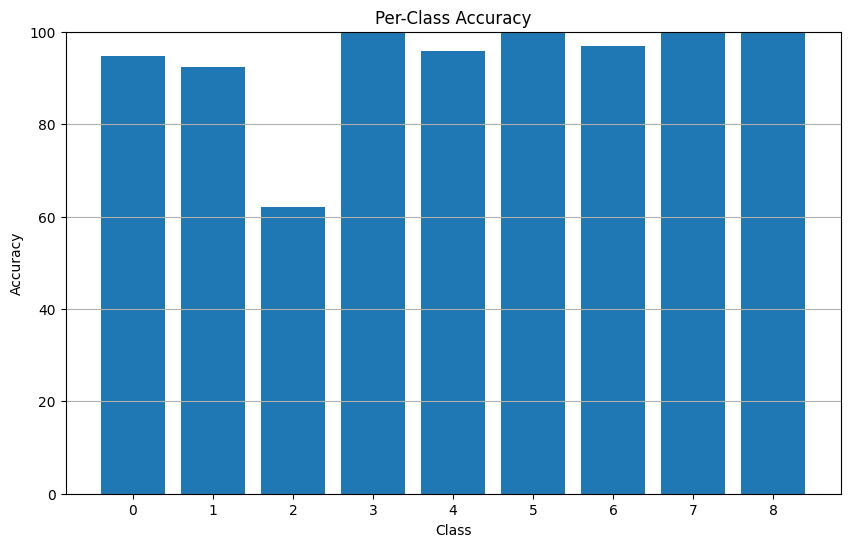

In [38]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dnn, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

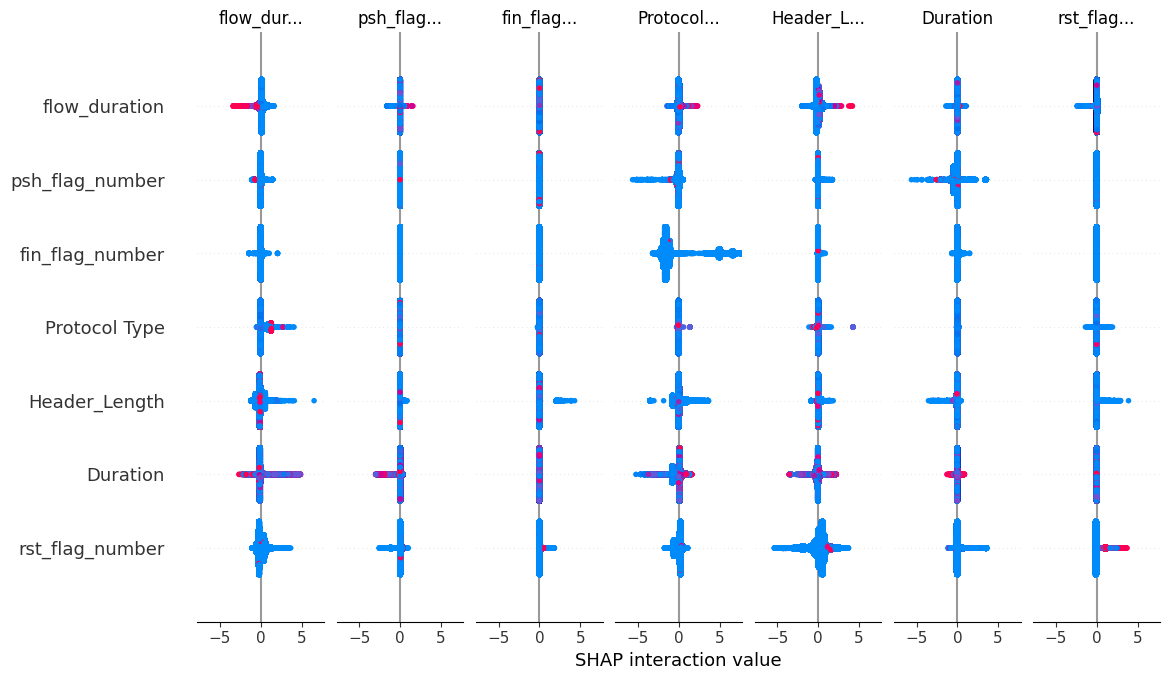

In [39]:
import shap

# Create a TreeExplainer for the trained Decision Tree model
explainer = shap.TreeExplainer(lgbm)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary for all classes (multiclass)
shap.summary_plot(shap_values, X_test_scaled, feature_names=df.drop('label', axis=1).columns)

C:\Users\krish\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


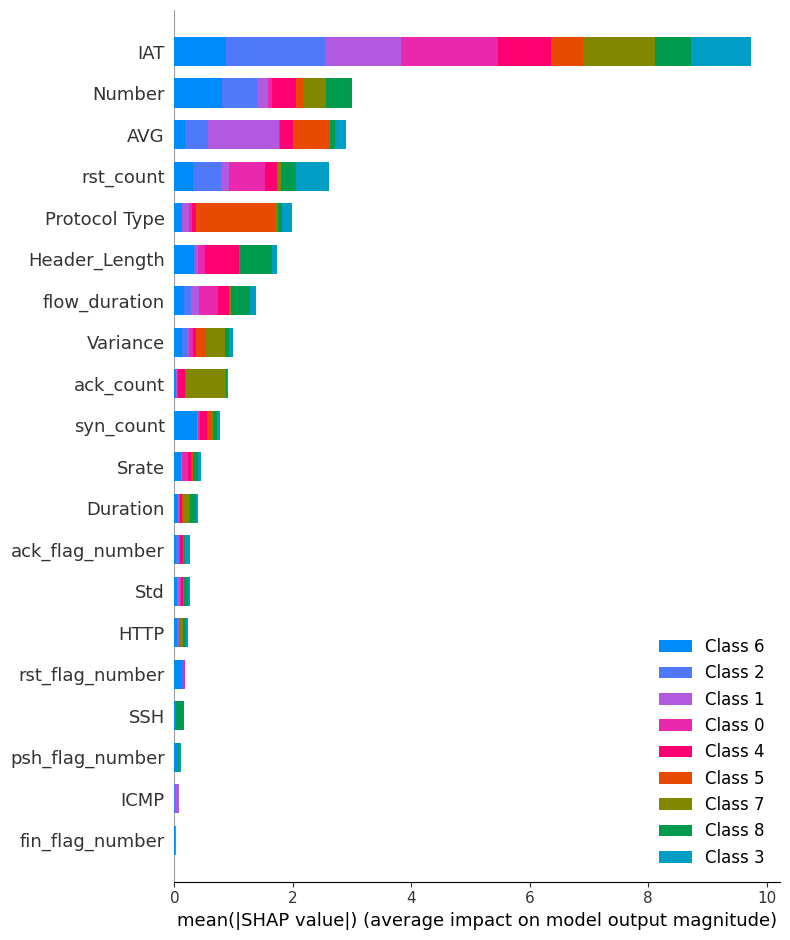

In [40]:
shap.summary_plot(
    shap_values, 
    X_test_scaled, 
    feature_names=df.drop('label', axis=1).columns,
    plot_type="bar"
)